# 패키지 및 라이브러리

In [42]:
import os
import pandas as pd
import numpy as np
import yahoo_fin.stock_info as si
import yfinance as yf
import xlwings as xw
import matplotlib.pyplot as plt
import openpyxl

### 구글번역기 연동, 해외유사기업 Business Summary 번역 요약 제공(추후 구현예정)

In [ ]:
# from googletrans import Translator
# from sumy.parsers.plaintext import PlaintextParser
# from sumy.nlp.tokenizers import Tokenizer
# from sumy.summarizers.lsa import LsaSummarizer
# from pandas_datareader import data as pdr

# 경로 지정

In [49]:
# 엑셀 파일 경로
file_path = r"C:\Users\User\Documents\GitHub\QuantifyPro\Python_portfolio\해외유사기업 취합_24.3Q_coding.xlsx"
# Github 자료 관리할 때 경로 매번 지정해줘야 함


# 엑셀 파일 열기
wb = xw.Book(file_path)
sheet = wb.sheets['TICKER']



df1=pd.read_excel(file_path, sheet_name='TICKER')
df2=pd.read_excel(file_path, sheet_name='price')

In [11]:
# df2[df2['Date']>='2023-10-31' ]

### 미국 및 일본에 상장된 기업의 TICKER만 추출하기

In [15]:
# Step 1: US에 해당하는 티커 필터링 및 중복 제거
tickers_with_country = sheet.range("A2:A" + str(sheet.range("A2").end('down').row)).value

filtered_tickers = []
for item in tickers_with_country:
    if item:
        split_item = item.split(" ")
        ticker = split_item[0]
        country = split_item[1]
        if country in ['US'] and ticker not in filtered_tickers:
            filtered_tickers.append(ticker)

# 필터링된 티커를 C열에 출력
sheet.range("B2:B" + str(len(filtered_tickers) + 1)).value = [[ticker] for ticker in filtered_tickers]

### 추출된 TICKER를 Yahoo Finance에서 조회하여 데이터 가져오기

In [16]:
# Step 2: yfinance를 사용해 각 티커에 대한 정보 가져오기
data = []
for ticker in filtered_tickers:
    try:
        ticker_data = yf.Ticker(ticker)
        info = ticker_data.info

        # Check if info is None or empty
        if not info:
            print(f"No data found for ticker {ticker}")
            data.append([ticker] + ['N/A'] * 21)  # 추가된 country를 고려해 21로 수정
            continue

        # 필요한 정보 추출
        country = info.get('country', 'N/A')
        industry = info.get('industry', 'N/A')
        sector = info.get('sector', 'N/A')
        business = info.get('longBusinessSummary', 'N/A')
        beta = info.get('beta', 'N/A')
        trailingPE = info.get('trailingPE', 'N/A')
        forwardPE = info.get('forwardPE', 'N/A')
        priceToBook = info.get('priceToBook', 'N/A')
        marketCap = info.get('marketCap', 'N/A')
        sharesOutstanding = info.get('sharesOutstanding', 'N/A')
        bookValue = info.get('bookValue', 'N/A')
        trailingEps = info.get('trailingEps', 'N/A')
        forwardEps = info.get('forwardEps', 'N/A')
        pegRatio = info.get('pegRatio', 'N/A')
        enterpriseToRevenue = info.get('enterpriseToRevenue', 'N/A')
        enterpriseToEbitda = info.get('enterpriseToEbitda', 'N/A')
        totalRevenue = info.get('totalRevenue', 'N/A')
        debtToEquity = info.get('debtToEquity', 'N/A')
        revenuePerShare = info.get('revenuePerShare', 'N/A')
        returnOnAssets = info.get('returnOnAssets', 'N/A')
        returnOnEquity = info.get('returnOnEquity', 'N/A')

        # 데이터 리스트에 추가 (추출한 정보 순서에 맞게 리스트 작성)
        data.append([ticker, country, industry, sector, business, beta, trailingPE, forwardPE, priceToBook, 
                     marketCap, sharesOutstanding, bookValue, trailingEps, forwardEps, pegRatio, 
                     enterpriseToRevenue, enterpriseToEbitda, totalRevenue, debtToEquity, revenuePerShare, 
                     returnOnAssets, returnOnEquity])

    except Exception as e:
        print(f"Error retrieving data for ticker {ticker}: {e}")
        data.append([ticker] + ['N/A'] * 21)  # 오류 시 21개의 'N/A'로 추가

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AYX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AYX&crumb=k0z95nSvhSp
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CRD/A?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CRD%2FA&crumb=k0z95nSvhSp


Error retrieving data for ticker CRD/A: Failed to parse json response from Yahoo Finance: {'code': 'Not Found', 'description': 'HTTP 404 Not Found'}


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/0609567D?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=0609567D&crumb=k0z95nSvhSp


In [17]:
# Step 3: 데이터프레임으로 변환
columns = ['Ticker', 'Country', 'Industry', 'Sector', 'Business', 'beta', 'trailingPE', 'forwardPE', 'priceToBook', 
           'marketCap', 'sharesOutstanding', 'bookValue', 'trailingEps', 'forwardEps', 'pegRatio',
           'enterpriseToRevenue', 'enterpriseToEbitda', 'totalRevenue', 'debtToEquity', 'revenuePerShare',
           'returnOnAssets', 'returnOnEquity']

df = pd.DataFrame(data, columns=columns)
df.set_index('Ticker', inplace=True)
df = df.sort_values(by='Sector')


### Step_one_index 시트에 데이터 붙여넣기

In [18]:
# Step 4: 'Ticker_Info_Test' 시트가 있는지 확인하고, 있으면 그 시트를 사용하고 없으면 새로 추가
if 'Step_one_index' in [sheet.name for sheet in wb.sheets]:
    output_sheet = wb.sheets['Step_one_index']
else:
    output_sheet = wb.sheets.add('Step_one_index')
    # 시트가 없을 경우에만 새로 추가

# output_sheet.clear() >> clear 함수를 이용하면 완전히 clear됨. 즉, 기존 서식마저도 모두 삭제
# 데이터프레임을 엑셀 시트에 저장
output_sheet.range("A1").value = df

In [20]:
# Microsoft 데이터 추출 테스트
# msft = yf.Ticker("MSFT")
# msft_price = msft.history(period="1y")
# msft_price["Close"]

# 차트 제작(분산형)

### 추후 구현 예정

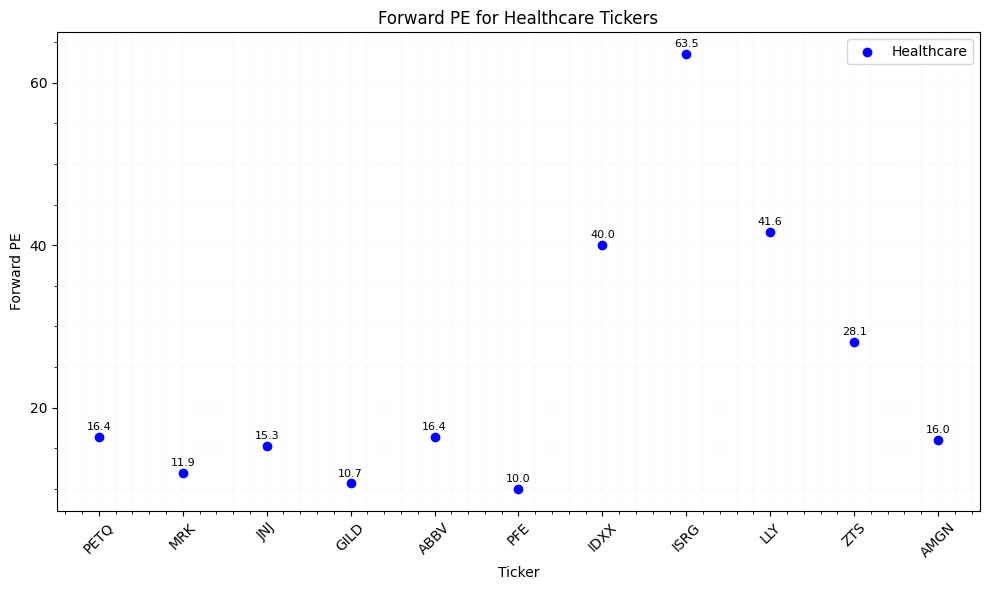

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: 'Healthcare' 섹터에 해당하는 데이터만 필터링
healthcare_df = df[df['Sector'] == 'Healthcare']

# Forward PE 값이 0 이상인 데이터만 필터링
healthcare_df = healthcare_df[healthcare_df['forwardPE'] >= 0]


# Step 2: 산점도 그리기
plt.figure(figsize=(10, 6))

# x축은 티커명 (인덱스), y축은 forwardPE 값
plt.scatter(healthcare_df.index, healthcare_df['forwardPE'], color='blue', label='Healthcare')

# 차트 제목, 축 레이블 추가
plt.title('Forward PE for Healthcare Tickers')
plt.xlabel('Ticker')
plt.ylabel('Forward PE')

# x축 레이블이 티커명이라 길 수 있어 각도를 45도로 조정
plt.xticks(rotation=45)

# 1. Grid 추가
plt.grid(True, which='both', linestyle='--', linewidth=0.05)

# 2. Minor 틱 추가
plt.minorticks_on()

# y축의 틱 간격을 5로 줄임
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(5))

# 3. 각 점 위에 forwardPE 값을 표시
for i, txt in enumerate(healthcare_df['forwardPE']):
    plt.annotate(f"{txt:.1f}", (healthcare_df.index[i], healthcare_df['forwardPE'].iloc[i]), 
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

# 범례 추가
plt.legend()

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()


# 6개월 주가 선별 대상

In [34]:
# Step 1: 엑셀 파일 열기 및 TICKER 시트에서 G2:G30의 티커명 읽기
file_path = r'C:\Users\User\Documents\GitHub\QuantifyPro\Python_portfolio\해외유사기업 취합_24.3Q_coding.xlsx'
wb = xw.Book(file_path)
sheet = wb.sheets['TICKER']

# G2부터 G30까지의 티커명 읽기
tickers = sheet.range('F2:F30').value

# None 또는 빈 문자열을 제거하여 유효한 티커만 남기기
tickers = [ticker for ticker in tickers if ticker is not None and ticker.strip() != ""]

# Step 2: 여러 티커에 대한 주가 데이터 가져오기 (1년간의 주가)
data = {}
for ticker in tickers:
    try:
        # 각 티커의 주가 데이터 가져오기 (1년치)
        ticker_data = yf.Ticker(ticker)
        price_data = ticker_data.history(period="1y")['Close']
        
        # 데이터를 딕셔너리에 저장 (티커명을 키로 사용)
        data[ticker] = price_data
        
    except Exception as e:
        print(f"Error retrieving data for ticker {ticker}: {e}")

# Step 3: 데이터프레임으로 변환
selected_ticker_price = pd.DataFrame(data)
selected_ticker_price = selected_ticker_price.sort_index(ascending=False)

In [35]:
# Step 5: 엑셀의 'price' 시트에 붙여넣기
if 'price' in [sheet.name for sheet in wb.sheets]:
    price_sheet = wb.sheets['price']
else:
    price_sheet = wb.sheets.add('price')

# 기존 데이터 지우기 (덮어쓰기)
# price_sheet.clear()

# 데이터프레임을 엑셀 시트에 붙여넣기
price_sheet.range("A1").value = selected_ticker_price


# ▲▲▲▲▲ 여기까지 작업 완료 ▲▲▲▲▲

In [ ]:
wm = yf.Ticker("WM")
wm.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2025-07-22 06:00:00-04:00,NaN,NaN,NaN
2025-04-22 06:00:00-04:00,NaN,NaN,NaN
2025-02-10 16:00:00-05:00,NaN,NaN,NaN
2024-10-22 06:00:00-04:00,1.89,NaN,NaN
2024-07-24 16:00:00-04:00,1.83,1.82,-0.0033
2024-04-24 17:00:00-04:00,1.51,1.75,0.1626
2024-02-12 18:00:00-05:00,1.53,1.74,0.1361
2023-10-24 17:00:00-04:00,1.61,1.63,0.0093
2023-07-25 17:00:00-04:00,1.54,1.51,-0.0203


#### pfizer 데이터 추출 예시

In [51]:
pfizer = yf.Ticker("PFE")
pfizer.info_df = pd.DataFrame(list(pfizer.info.items()), columns=['Key', 'Value'])
pfizer.info_df.head(15)


,Key,Value
0,address1,66 Hudson Boulevard East
1,city,New York
2,state,NY
3,zip,10001-2192
4,country,United States
5,phone,212 733 2323
6,website,https://www.pfizer.com
7,industry,Drug Manufacturers - General
8,industryKey,drug-manufacturers-general
9,industryDisp,Drug Manufacturers - General


In [43]:
pfizer = yf.Ticker("PFE")
pfizer.info_df = pd.DataFrame(list(pfizer.info.items()), columns=['Key', 'Value'])
pfizer.info_df.head(15)

# .info 메서드를 통해 딕셔너리 형태의 데이터를 가져옴
msft_info = msft.info

# 딕셔너리를 데이터프레임으로 변환
msft_info_df = pd.DataFrame(list(msft_info.items()), columns=['Key', 'Value'])

# pandas 출력 옵션 설정: 최대 행 수를 None으로 설정하여 모두 출력
pd.set_option('display.max_rows', None)


AttributeError: 'Ticker' object has no attribute 'head'

### .info 데이터 키 값 확인

In [64]:
import yfinance as yf
import pandas as pd

# Ticker 정보 가져오기
wm = yf.Ticker("WM")
# wm_info_df = pd.DataFrame(wm.info)


# 엑셀 시트 선택
key_sheet = wb.sheets['PARAMETER']

# DataFrame의 값을 리스트로 변환하여 엑셀에 쓰기 (헤더 포함)
# key_sheet.range("A13").value = wm_info_df



TypeError: 'dict' object is not callable

In [48]:
key_sheet = wb.sheets('PARAMETER')

In [38]:
# Step 1: MSFT 티커 정보 가져오기
msft = yf.Ticker("MSFT")

# Step 2: 1년간의 주가 데이터 가져오기
msft_price = msft.history(period="1y")

# Step 3: 최근 재무제표에서 Basic EPS 값 가져오기
# yfinance의 income statement에서 Basic EPS 가져오기
income_stmt = msft.income_stmt  # income statement 정보 가져오기
latest_eps = income_stmt.loc['Basic EPS'].iloc[0]  # 최근 재무 기준일의 Basic EPS

# Step 4: 매일의 PER 계산 (종가 / Basic EPS)
msft_price['PER'] = msft_price['Close'] / latest_eps

In [ ]:
msft_price[['Close','PER']]

,Close,PER
Date,,
2023-08-21 00:00:00-04:00,319.481964,26.937771
2023-08-22 00:00:00-04:00,320.057617,26.986308
2023-08-23 00:00:00-04:00,324.563812,27.366257
2023-08-24 00:00:00-04:00,317.586182,26.777924
2023-08-25 00:00:00-04:00,320.573761,27.029828
...,...,...
2024-08-14 00:00:00-04:00,416.109985,35.085159
2024-08-15 00:00:00-04:00,421.029999,35.500000
2024-08-16 00:00:00-04:00,418.470001,35.284149


In [ ]:
# Step 6: 그래프로 PER 시각화
plt.figure(figsize=(20, 10))
plt.plot(msft_price.index, msft_price['PER'], label='PER', color='black', linestyle='-', marker='o')
plt.title('MSFT PER (Price-to-Earnings Ratio) Over Time')
plt.xlabel('Date')
plt.ylabel('PER')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
pe_ratio_ttm = info.get('trailingPE', 'N/A')
data = {}
df = pd.DataFrame(data)

In [ ]:
# Step 5: 엑셀의 'price' 시트에 붙여넣기
if 'price' in [sheet.name for sheet in wb.sheets]:
    price_sheet = wb.sheets['price']
else:
    price_sheet = wb.sheets.add('price')

# 기존 데이터 지우기 (덮어쓰기)
# price_sheet.clear()

# 데이터프레임을 엑셀 시트에 붙여넣기
price_sheet.range("A1").value = selected_ticker_price



In [ ]:
# Step 1: MSFT 티커 정보 가져오기
msft = yf.Ticker("MSFT")
msft_info_df = pd.DataFrame(list(msft.info.items()), columns =['Key', 'Value'])




# .info 메서드를 통해 딕셔너리 형태의 데이터를 가져옴
# msft_info = msft.info

# 딕셔너리를 데이터프레임으로 변환
# msft_info_df = pd.DataFrame(list(msft_info.items()), columns=['Key', 'Value'])


key_sheet = wb.sheets['PARAMETER']
key_sheet.range("A13").value = msft_info_df

In [ ]:
# Step 4: Sector 및 priceToBook 값이 'N/A'가 아닌 행만 필터링
df = df[df['Sector'] != 'N/A']
df['priceToBook'] = pd.to_numeric(df['priceToBook'], errors='coerce')  # priceToBook을 숫자로 변환

# Step 5: Sector별로 그룹화하고, 각 Sector에서 priceToBook 값의 평균 계산
sector_price_to_book = df.groupby('Sector')['priceToBook'].mean()

# Step 6: 그래프 시각화 (matplotlib 사용)
plt.figure(figsize=(10, 6))
sector_price_to_book.plot(kind='bar', color='skyblue')
plt.title('Average Price-to-Book Ratio by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Price-to-Book Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')

In [ ]:
# Step 6: 그래프 시각화 (matplotlib 사용)
plt.figure(figsize=(10, 6))
sector_price_to_book.plot(kind='bar', color='skyblue')
plt.title('Average Price-to-Book Ratio by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Price-to-Book Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')

# 그래프를 이미지 파일로 저장 (절대 경로 사용)
image_path = r'C:\Users\dwchae23\Desktop\Python_portfolio\img_source\price_to_book_graph.png'
plt.tight_layout()

# savefig를 show 전에 호출해서 그래프가 제대로 저장되도록 함
plt.savefig(image_path)

# 그래프가 화면에 출력되지 않도록 plt.close()로 닫음
plt.close()

# Step 7: 이미지 파일 존재 여부 확인
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The image file was not found at {image_path}")

# Step 8: 엑셀 파일 열기 및 GRAPH 시트에 이미지 삽입
file_path = r'\\10.10.10.11\Ai본부\F.AI본부\★평가리뷰\대체평가3팀(리뷰)\해외유사기업\해외유사기업 취합_24.3Q_coding.xlsx'  # 엑셀 파일 경로 설정
wb = xw.Book(file_path)

# Step 9: 'GRAPH' 시트가 있는지 확인하고, 있으면 그 시트를 사용하고 없으면 새로 추가
if 'GRAPH' in [sheet.name for sheet in wb.sheets]:
    graph_sheet = wb.sheets['GRAPH']
else:
    graph_sheet = wb.sheets.add('GRAPH')

# 기존 내용 지우기 (덮어쓰기)
graph_sheet.clear()

# Step 10: 그래프 이미지 엑셀 시트에 삽입
graph_sheet.pictures.add(image_path, name='PriceToBookGraph', update=True, left=50, top=50)


<Picture 'PriceToBookGraph' in <Sheet [해외유사기업 취합_24.3Q_coding.xlsx]GRAPH>>